# Telco Customer Churn
## Goal:
   * Predict customer churn
   * Find out the key drivers that lead to churn
   * Create a model that performs better than the baseline
   * Document code and process well enough to be presented or read like a report
## Importing Libraries and data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import wrangle as w
import explore as e
import modeling as m
df = w.get_telco()
df = w.wrangle_telco_encoded(df)
train, validate, test = w.train_validate_test(df, "churn")
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1', random_state=123, solver='liblinear', C=1)
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=3, random_state=123)
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=3, n_estimators=100, max_depth=5, random_state=123)
from sklearn.neighbors import KNeighborsClassifier
model4 = knn = KNeighborsClassifier(n_neighbors=10)


# Acquire Data
   * Data is acquired from codeup database using get_telco_data function from wrangle.py
   * Telco has 7043 rows and 24 columns before cleaning
# Prepare
## Prepare Actions
   * Checked for null values and found none
   * Checked for duplicates and found none
   * Converted total_charges to float by replacing blank spaces with 0
   * Made column for above average monthly charge for exploration
   * Encoded columns for modeling
   * Split data into train, validate, and test
# Explore
# Is fiber optic a driver of churn?
$H_0$: Customers with fiber optic do not have a higher churn rate than those with DSL.
$H_a$: Customers with fiber optic have a higher churn rate than those with DSL.

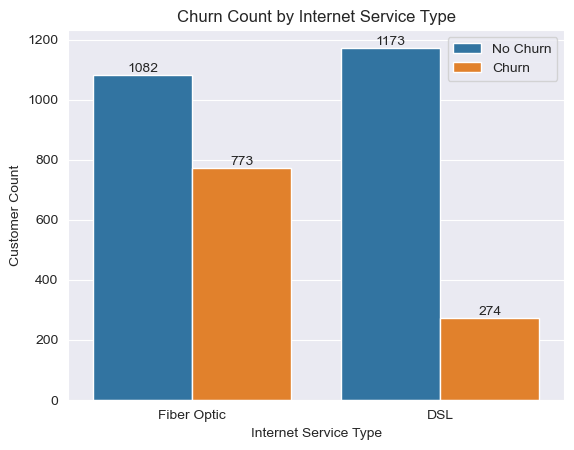

chi^2 = 1719.7872
p     = 0.0000
We reject the null hypothesis


In [2]:
# Get Bar Plot of Churn Rate by Internet Service Type
e.plot_churn_rate_by_internet_service_type(train)
# Get Chi2 Test Results
e.chi2_test_for_churn_and_internet_service_type_short(train)

## Takeaways
   * Fiber optic customers are more likely to churn than DSL customers
   * Fiber optic customers have a churn rate of 41.5% compared to DSL customers who have a churn rate of 18.5%
   * Fiber optic customers are 2.25 times more likely to churn than DSL customers
   * Removed customers with no internet service from plot and chi2 test but kept them in the data

# Is fiber optic price a driver of churn?
$h_0$: Customers with fiber optic who pay more than the average monthly charge do not have a higher churn rate than those who pay less than the average monthly charge.
$h_a$: Customers with fiber optic who pay more than the average monthly charge have a higher churn rate than those who pay less than the average monthly charge.

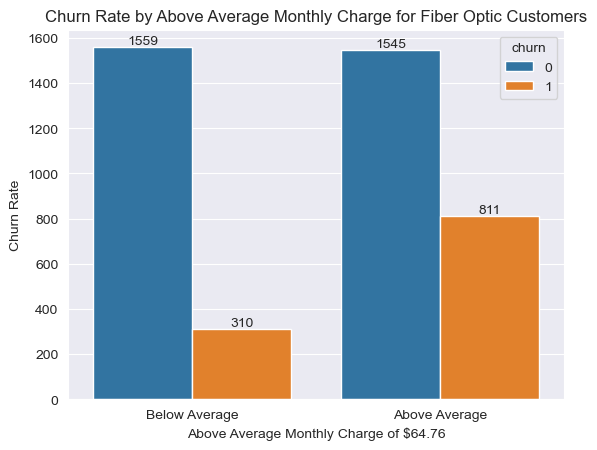

chi^2 = 169.1828
p     = 0.0000
We reject the null hypothesis


In [3]:
e.plot_churn_rate_by_above_avg_monthly_charge(train)
e.chi2_test_for_churn_and_above_avg_monthly_charge_short(train)

## Takeaways
   * Created Column that shows if customer pays more than the average monthly charge or not
   * Customers with monthly charges above the average are more likely to churn than those with monthly charges below the average
   * Customers with monthly charges above the average have a churn rate of 42.5% compared to customers with monthly charges below the average who have a churn rate of 17.5%

# Is contract type a driver of churn?
$h_0$: Customers with month-to-month contracts do not have a higher churn rate than those with one or two year contracts.
$h_a$: Customers with month-to-month contracts have a higher churn rate than those with one or two year contracts.

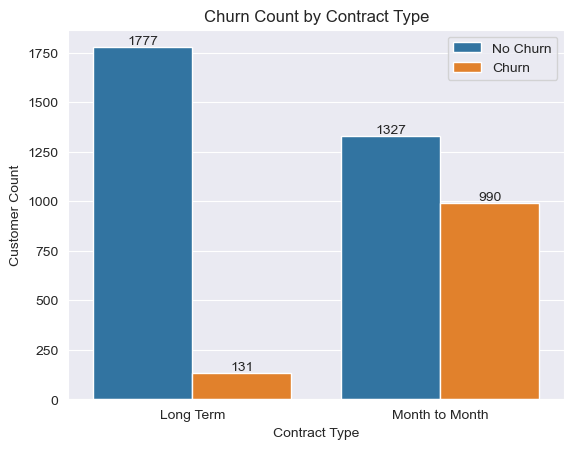

chi^2 = 688.5107
p     = 0.0000
We reject the null hypothesis


In [4]:
e.plot_churn_rate_by_contract_type(train)
e.chi2_test_for_churn_and_contract_type_short(train)

## Takeaways
   * Created Column that shows if customer has Month to Month or Long Term Contract(1 or 2 years)
   * Customers with Month to Month contracts are more likely to churn than those with one or two year contracts
   * Customers with Month to Month contracts have a churn rate of 42.5% compared to customers with Long Term contracts who have a churn rate of 6.5%
# Are customers with dependents more likely to churn than those without?
$h_0$: Customers with dependents do not have a higher churn rate than those without dependents.
$h_a$: Customers with dependents have a higher churn rate than those without dependents.

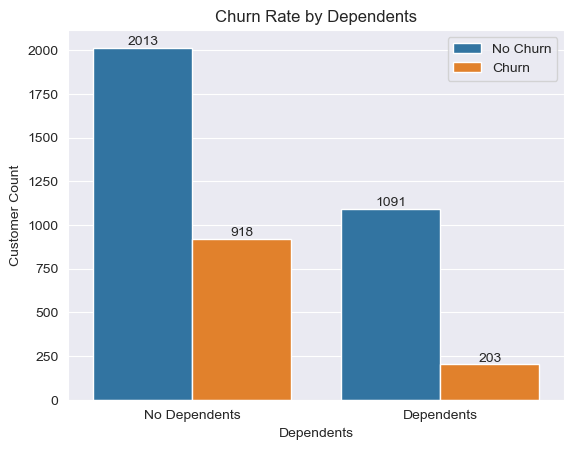

chi^2 = 111.7405
p     = 0.0000
We reject the null hypothesis


In [5]:
e.plot_churn_rate_by_dependents(train)
e.chi2_test_for_churn_and_dependents_short(train)

## Takeaways
   * Customers without dependents are more likely to churn than those with dependents
   * Customers without dependents have a churn rate of 40.5% compared to customers with dependents who have a churn rate of 15.5%
# Exploration Summary
   * Fiber optic customers are more likely to churn than DSL customers
   * Customers with monthly charges above the average are more likely to churn than those with monthly charges below the average
   * Customers with Month to Month contracts are more likely to churn than those with Long Term contracts
   * Customers without dependents are more likely to churn than those with dependents
# Selected Features for Modeling
   * tenure
   * monthly_charges
   * total_charges
   * contract_type
   * internet_service_type
   * payment_type
   * senior_citizen
   * partner
   * dependents
   * phone_service
   * multiple_lines
   * online_security
   * online_backup
   * device_protection
   * tech_support
   * streaming_tv
   * streaming_movies
   * paperless_billing
   * churn
# Features that will be dropped
   * gender(Has no significance to churn)
   * payment_type_id(same as payment_type)
   * internet_service_type_id(same as internet_service_type)
   * contract_type_id(same as contract_type)
# Modeling

In [6]:
# Split data into train, validate, and test
x_train, y_train, x_validate, y_validate, x_test, y_test = m.split_xy(train, validate, test)

# Baseline Prediction
   * Baseline prediction of customers who do not churn is 73.46%
   * For the model to be useful, it must perform better than the baseline
# Model Selection
   * I will be using Decision Tree, Random Forest, KNN model, and Logistic Regression
   * I will be using accuracy as my evaluation metric

# Decision Tree


In [7]:
m.validate_model_test_short(model2, x_train, y_train, x_validate, y_validate)

Accuracy of DecisionTreeClassifier(max_depth=3, random_state=123) on training set: 0.7869822485207101
Accuracy of DecisionTreeClassifier(max_depth=3, random_state=123) on validate set: 0.7927608232789212


# Random Forest

In [8]:
m.validate_model_test_short(model3, x_train, y_train, x_validate, y_validate)

Accuracy of RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123) on training set: 0.796923076923077
Accuracy of RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123) on validate set: 0.8097941802696949


# KNN

In [9]:
m.validate_model_test_short(model4, x_train, y_train, x_validate, y_validate)

Accuracy of KNeighborsClassifier(n_neighbors=10) on training set: 0.8075739644970414
Accuracy of KNeighborsClassifier(n_neighbors=10) on validate set: 0.7792760823278921


# Logistic Regression

In [10]:
m.validate_model_test_short(model, x_train, y_train, x_validate, y_validate)

Accuracy of LogisticRegression(C=1, penalty='l1', random_state=123, solver='liblinear') on training set: 0.8002366863905326
Accuracy of LogisticRegression(C=1, penalty='l1', random_state=123, solver='liblinear') on validate set: 0.8147622427253371


# Logistic Regression Model Visualization

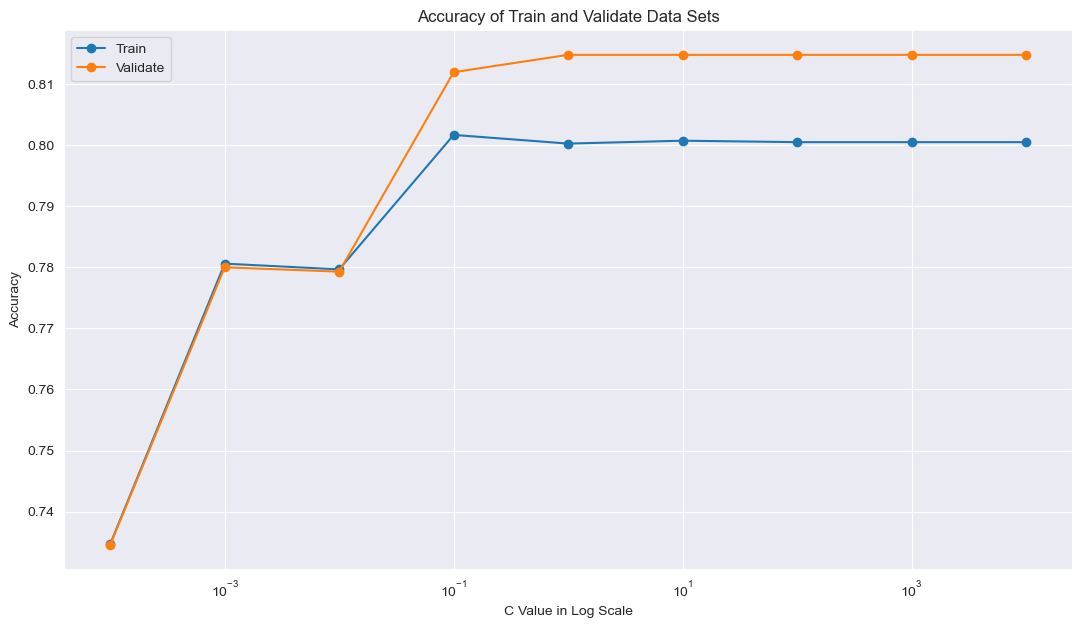

In [11]:
m.visualize_model(x_train, y_train, x_validate, y_validate)

## Takeaways
   * Model with C = 1 performed the best with an accuracy of 81.5%
    * The difference between train and validate is 0.1%

# Comparion of Models
   * Logistic Regression performed the best with an accuracy of 81.5%
   * Random Forest performed well with an accuracy of 80.9% on validate
# Model Evaluation
   * All models performed better than the baseline
   * Tested hyperparameters for each model to get the best accuracy with lowest variance between train and validate
   * Logistic Regression performed the best and will be used on test




# Logistic Regression Model on Test

In [12]:
m.test_model_test2_short(x_train, y_train, x_test, y_test)

------------------------------------
Model: LogisticRegression(C=1, penalty='l1', random_state=123, solver='liblinear')
Accuracy of model on test set: 0.818


# Modeling Summery
   * Logistic Regression performed the best with an accuracy of 81.8%
   * Random Forest performed the worst with an accuracy of 77.5%
   * KNN performed in the middle with an accuracy of 79.5%
   * All models performed better than the baseline
   * Models were evaluated on accuracy
   * Tested hyperparameters for each model to get the best accuracy with lowest variance between train and validate

# Conclusion

## Key Findings
   * Fiber optic customers are more likely to churn than DSL customers
   * Customers with monthly charges above the average are more likely to churn than those with monthly charges below the average
   * Customers with month-to-month contracts are more likely to churn than those with one or two year contracts
   * Customers without dependents are more likely to churn than those with dependents

## Recommendations
   * Offer incentives to customers with fiber optic to switch to DSL
   * Offer incentives to customers with monthly charges above the average to switch to a lower monthly charge
   * Offer incentives to customers with month-to-month contracts to switch to a one or two year contract
   * Offer incentives to customers without dependents to add dependents to their account

# Next Steps
* Run statistical tests on entire data set
* Deep dive into fiber optic customers to see what is driving churn
* Look into ways not mentioned above to reduce churn